# Introduction

In this project, we are aiming to find out how Elon Musk's tweets affects the cryptocurrency market prices of Dogecoin and Bitcoin. To do this, we have collected data from Elon's tweets (dates and tweet content) and stock data (date, open, close, etc.) to compare the average change in crypto price of these specific coins. We will analyze the date of Elon's tweets and also look at the stock prices on that date. We hypothesized that whenever Elon tweets about Dogecoin or Bitcoin, the prices of these coins would increase in the following 7 days afterwards because of his influence.

# Part 1: Reading in Elon's tweet dataset to construct an LoL -> dataframe

After downloading the csv file containing data about Elon's tweets, we formatted it into an LoL but excluded any columns that would be unnecessary for our use like *screenname* or *tweetid*. This is why *date* and *tweet* are the only indices used to contruct the LoL, which was then turned into a dataframe that outputs Elon's tweets and the day/time they were tweeted.


In [1]:
import pandas as pd 
import numpy as np

_date = 4
_tweet = 7

#Create LoL for Elon Musk's tweets data from 2010 to 2021
file = open("2021.csv", 'r')
lol = []

columns = file.readline().strip().split(',')  # list containing column fields
mycolumns = ['date', 'tweet']

for line in file:
    curRow = line.strip().split(',')
    curList = []
    curList.append(str(curRow[_date]))
    curList.append(str(curRow[_tweet]))
    lol.append(curList)

#Convert that LoL to data frame
tweetDF = pd.DataFrame(lol, columns = mycolumns)
tweetDF.head(10)

,date,tweet
0,2021-03-22 02:10:37,@bluemoondance74 @NASASpaceflight Going well. ...
1,2021-03-21 20:39:07,@NASASpaceflight Hopefully will happen this de...
2,2021-03-21 08:42:00,@newscientist True
3,2021-03-21 05:31:31,@cleantechnica I am accumulating resources to ...
4,2021-03-21 04:32:11,"""@CathieDWood When vast amounts of manufacturi..."
5,2021-03-21 04:25:23,"""@Swaggerheim @SciGuySpace Not trying to roast"
6,2021-03-21 04:23:40,@johnkrausphotos 🤣🤣
7,2021-03-21 04:22:32,"""@AtomicsAstro @PPathole Yeah"
8,2021-03-21 04:21:32,"""@SciGuySpace Not quite how I would tell the s..."
9,2021-03-21 04:19:13,@PPathole This is important


#### cont.
Then we realized that the *date* column was formatted where the time of the tweet was also included. Since this would interfere with how we would use the data later on in our project, we wrangled the tweet dataframe to split the date and time by the space inbetween, then deleted the time from every row in the column.

In [2]:
## Wrangling the tweet dataframe

new = tweetDF["date"].str.split(" ", n = 1, expand = True)
tweetDF["Date"]= new[0]
tweetDF.drop(columns =["date"], inplace = True)

tweetlist = []
tweetlist = tweetDF['tweet']
tweetDF.set_index(["tweet"], inplace=True)

In [3]:
tweetDF

,Date
tweet,
@bluemoondance74 @NASASpaceflight Going well. Lot of work for an extra 20 secs of Isp!,2021-03-22
@NASASpaceflight Hopefully will happen this decade,2021-03-21
@newscientist True,2021-03-21
@cleantechnica I am accumulating resources to help make life multiplanetary &amp; extend the light of consciousness to the stars,2021-03-21
"""@CathieDWood When vast amounts of manufacturing are needed",2021-03-21
...,...
That was a total non sequitur btw,2011-12-03
"""Great Voltaire quote",2011-12-03
I made the volume on the Model S http://t.co/wMCnT53M go to 11. Now I just need to work in a miniature Stonehenge...,2011-12-01


# Part 2: Reading in Dogecoin & Bitcoin price dataset to construct a DoL -> dataframe

After downloading the csv files containing data about Dogecoin and Bitcoin prices, we read them both in as DoLs. A few of the rows included "null" information, which wasn't useful for our project and created issues as we continued to build our code. So, we used an *if-statement* that iterated through every line in the csv file to only include rows that had data into our DoL.

In [4]:
Date = 0
Open = 1
High = 2
Low = 3
Close = 4
Adjclose = 5
Volume = 6
filenameBTC = 'BTC-USD.csv'
filenameDoge = 'DOGE-USD.csv'

def buildDol(filename):
    '''Build a dictionary of lists representation of table from the file'''
    file = open(filename, 'r')
    dol = {}
    columns = file.readline().strip().split(',')    # read first line
    
    for field in columns:   # initialize mapping of column fields
        dol[field] = []
        
    for line in file:
        curRow = line.strip().split(',')
        if curRow[Date] != "null" and curRow[Open] != "null" and curRow[High] != "null" and curRow[Low] != "null" and curRow[Close] != "null" and curRow[Adjclose] != "null" and curRow[Volume] != "null":
            dol[columns[Date]].append(str(curRow[Date]))
            dol[columns[Open]].append(float(curRow[Open]))
            dol[columns[High]].append(float(curRow[High]))
            dol[columns[Low]].append(float(curRow[Low]))
            dol[columns[Close]].append(float(curRow[Close]))
            dol[columns[Adjclose]].append(float(curRow[Adjclose]))
            dol[columns[Volume]].append(float(curRow[Volume]))
  
    return dol

btcusd = buildDol(filenameBTC)
dogeusd = buildDol(filenameDoge)
btcDF = pd.DataFrame(btcusd)
dogeDF = pd.DataFrame(dogeusd)

In [5]:
dogeDF

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-02,0.000228,0.000230,0.000222,0.000226,0.000226,1.955200e+05
1,2017-01-03,0.000224,0.000228,0.000222,0.000227,0.000227,1.323520e+05
2,2017-01-04,0.000227,0.000239,0.000225,0.000236,0.000236,4.420950e+05
3,2017-01-05,0.000233,0.000257,0.000221,0.000229,0.000229,9.947300e+05
4,2017-01-06,0.000228,0.000235,0.000218,0.000220,0.000220,3.050840e+05
...,...,...,...,...,...,...,...
1532,2021-03-18,0.057640,0.058828,0.054143,0.057383,0.057383,9.097774e+08
1533,2021-03-19,0.057377,0.059721,0.056604,0.058328,0.058328,9.647478e+08
1534,2021-03-20,0.058315,0.060639,0.058120,0.058961,0.058961,1.012934e+09
1535,2021-03-21,0.058970,0.059521,0.056798,0.057234,0.057234,7.595930e+08


# Part 3: Using Regular Expression to find keywords relevant to Dogecoin and Bitcoin & creating list of those dates

We created a list for Bitcoin keywords and another for Dogecoin, then used a for loop to search through the tweets for those keywords using regular expression. The matches were then appended into a list of what date the tweets were made so we knew what dates to analyze for both cryptocurrency coins. We then made another list to store the indexes of the dates since we would be using *iloc* to do later calculations, which is integer location based and made it easier to access the data we needed.

In [6]:
import re
btc_key = ['BTC','Bitcoin', 'Crypto','cryptocurrency', 'satoshi nakamoto', 'cryptowhale', 'DocumentingBTC']
doge_key = ['dogecoin', 'Dogecoinrich','dogematic', 'doge', 'cryptocurrency','Dogecake']


#Create a indices list of the date Bitcoin is mentioned from btcDF
btc_date_mention_list = []
doge_date_mention_list = []

for t in tweetlist:
    foundMatch = False  #Checking variable
    for key in btc_key:
        pattern = r'(?i).*'+re.escape(key)+r'.*' #pattern to match Bitcoin keywords
        matches = []
        for match in re.finditer(pattern, t):
            foundMatch = True 
            item = (match.group(0))
            matches.append(item)
            
        if foundMatch:
            day = tweetDF.loc[t,'Date']
            if day not in btc_date_mention_list:
                btc_date_mention_list.append(str(day))
                
    foundMatch = False  #Checking variable
    for key in doge_key:
        pattern = r'(?i).*'+re.escape(key)+r'.*' #pattern to match Dogecoin keywords
        matches = []
        for match in re.finditer(pattern, t):
            foundMatch = True
            item = (match.group(0))
            matches.append(item)
            
        if foundMatch:
            day = tweetDF.loc[t,'Date']
            if day not in doge_date_mention_list:
                doge_date_mention_list.append(str(day))

                
index = btcDF.index
btc_date_index_list = []
doge_date_index_list = []

for i in btc_date_mention_list:
    btc_date_index_list.append(btcDF.index[btcDF["Date"] == i].tolist()[0])   
for i in doge_date_mention_list:
    doge_date_index_list.append(dogeDF.index[dogeDF["Date"] == i].tolist()[0])  

In [7]:
#Set index for Bitcoin and Dogecoin dataframes
btcDF.set_index(["Date"], inplace=True)
dogeDF.set_index(["Date"], inplace=True)

# Part 4: Calculating average of crypto price changes based on tweet dates

We created a formula that would find the average change in the prices of Bitcoin and Dogecoin by subtracting the opening price of the stock from the closing, then dividing that by the opening. We also wanted to do this for the following 6 days after Elon tweeted to make our results more conclusive because his tweet would have an effect on stock prices even a few days after, not only on the same day the tweet was made. Our final results were the average price change of stock within the same week that Elon made a tweet related to Bitcoin and Dogecoin. 

In [14]:
## Calulate average Bitcoin price movement after a week when Elon Musk tweeted about Bitcoin

totalBtc = 0
BtcChange = []

for i in btc_date_index_list:
    if i < 1528:
        totalBtc += ((btcDF.iloc[i+6, 3] - btcDF.iloc[i, 0]) / btcDF.iloc[i, 0] * 100)
        BtcChange.append(((btcDF.iloc[i+6, 3] - btcDF.iloc[i, 0]) / btcDF.iloc[i, 0] * 100))
avgBtc = round(totalBtc / (len(btc_date_index_list)),2)


In [15]:
## Calulate average Dogecoin price movement after a week when Elon Musk tweeted about Dogecoin

totalDoge = 0
DogeChange = []

doge_date_mention_list = doge_date_mention_list[2:]
doge_date_index_list = doge_date_index_list[2:]
for i in doge_date_index_list:
    if i < 1529:
        totalDoge += ((dogeDF.iloc[i+6, 3] - dogeDF.iloc[i, 0]) / dogeDF.iloc[i, 0] * 100)
        DogeChange.append(((dogeDF.iloc[i+6, 3] - dogeDF.iloc[i, 0]) / dogeDF.iloc[i, 0] * 100))
avgDoge = round(totalDoge / (len(doge_date_index_list)),2)

In [16]:
avgBtc 

7.28

In [17]:
avgDoge

17.61

Those numbers (avgBtc and avgDoge) help us draw the conclustion that if we buy cryptocurrency when Elon Musk tweeted about it and sell it after 1 week, on average we can make a profit of 7.28% for Bitcoin and 17.61% for Dogecoin. This is a big profit for crypto traders.

# Part 5: Creating graphs

These graphs allow us to visually see how the crypto price of each respective coin changes in the week that Elon posted a tweet. For Bitcoin, Elon's impact is mostly positive and there are many sharp increases around the same time he tweeted, which supports our hypothesis that his tweets and crypto price are positively correlated. There are also instances where the change in price is not much or there are drops, which we are unsure if it is related to Elon or other outside factors.

For Dogecoin, there is a time frame where we see a very sharp increase in stock price according to Elon's tweets. But the price change for the other dates seem to be around the same range or have an overall negative influence. This shows that Elon's influence on Dogecoin's price is very inconsistent.

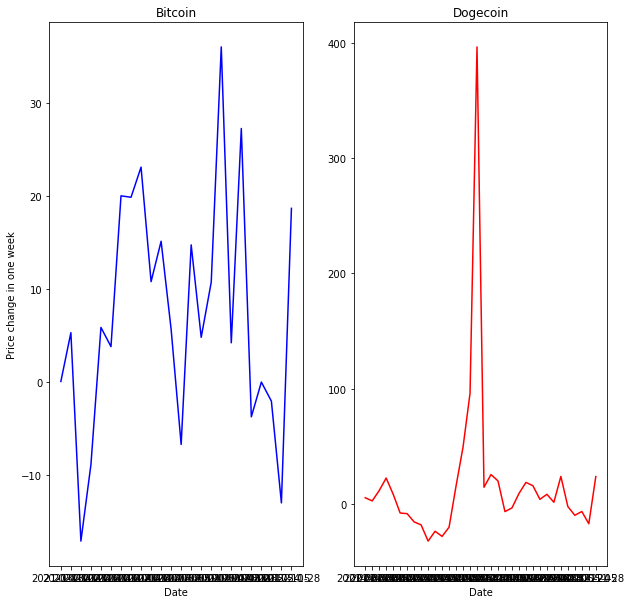

In [13]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10,10))

plt.subplot(1, 2, 1)
plt.plot(btc_date_mention_list, BtcChange, label='Bitcoin Price', color='blue')
plt.xlabel('Date')
plt.ylabel('Price change in one week')
plt.title('Bitcoin')

plt.subplot(1, 2, 2)
plt.plot(doge_date_mention_list, DogeChange, label='Dogecoin Price', color = 'red')
plt.title('Dogecoin')
plt.xlabel('Date')

plt.show() 
